##Time Series Forecasting -Bit Predict

In [1]:
#get data
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"

--2021-09-07 02:53:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-09-07 02:53:58 (7.29 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



##Importing data with pandas


In [2]:
#import with pandas
import pandas as pd

df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
#data count
len(df)

2787

#Visualize the data

In [5]:
#take clsoing price and data
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)" :"Price" })
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


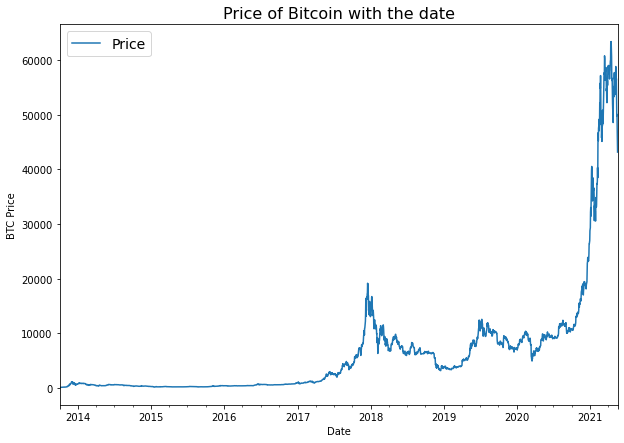

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin with the date",fontsize=16)
plt.legend(fontsize=14)

#Importing time series data with python csv module

In [7]:
#formatting data 
import csv
from datetime import datetime

timesteps =[]
btc_price =[]

with open ("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader=csv.reader(f,delimiter=",")
  
  #skip the first line (remove the header line
  next(csv_reader)

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

#view first 10
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

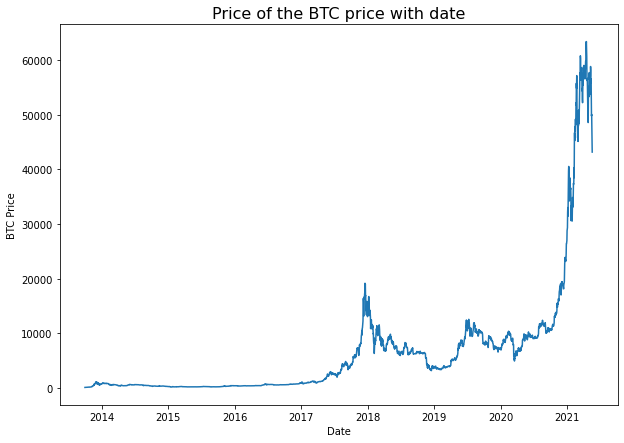

In [8]:
#plot from csv
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.title("Price of the BTC price with date",fontsize=16)
plt.xlabel("Date")



---



#Create data part :Train and Test Data


In [9]:
#get bitcoin data arrya
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()
    
timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
#wrong way
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(timesteps,
                                                prices,
                                                test_size=0.2,
                                                random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

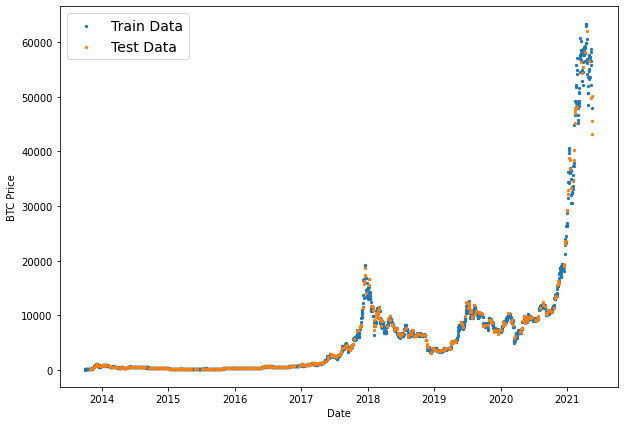

In [11]:
#plot the wrong test and train data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

#Create Train and Test data -Correct way

In [12]:
#craete train and test splits 
split_size =int(0.8 *len(prices))

#create train data splits
X_train,y_train =timesteps[:split_size],prices[:split_size]


#create test data splits
X_test,y_test =timesteps[split_size:],prices[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

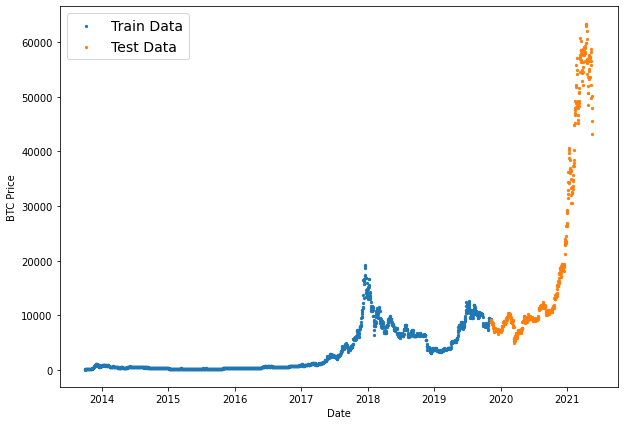

In [13]:
#plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

#Plot and Visualize Data

In [14]:
#create plot function to plot time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  """
  Plot the timesteps aginst the values

  parameters:
  timesteps : array of timesteps values
  values :array of values across time
  format :style of plot, default "."
  start :where start the plot
  end :where to end the plot
  label =label to show on the plot
  """
 
  #plot the series
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

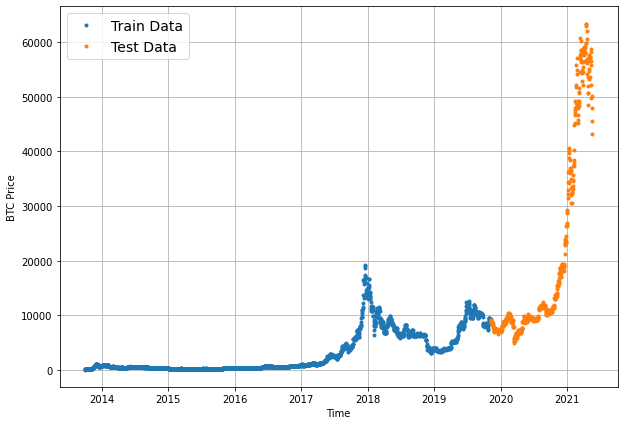

In [15]:
#test the plotting fucntion
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train Data")
plot_time_series(timesteps=X_test,values=y_test,label="Test Data")

#Model 0 -Naive Forecast Model (Base line Model)

In [16]:
#create naive forecast
naive_forecast =y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

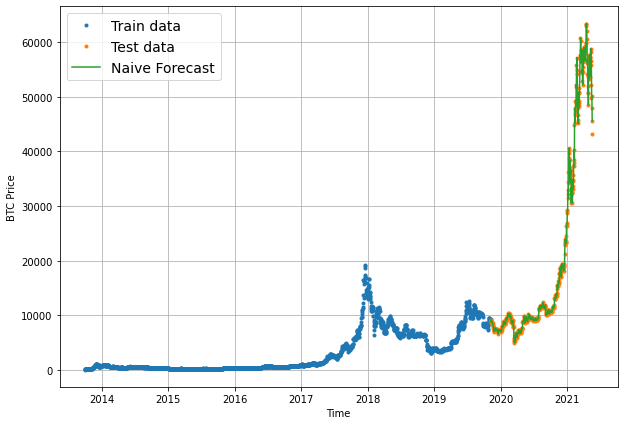

In [17]:
#plot the naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format="-",label="Naive Forecast")

#Evalauting the time series model

In [18]:
import tensorflow as tf


In [19]:
#mase implementation
def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implement MASE(asssuming no saeonability of data)


  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  #find the mae of naive forecast
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_true=y_test[1:] ,y_pred=naive_forecast).numpy()

0.9995699939182624

In [21]:
#craete a function to take model predctions and truth values and return evaluation metrics
def evaluate_preds(y_true,y_pred):
  
  #make sure float32 datatype
  y_true =tf.cast(y_true,dtype=tf.float32)
  y_pred =tf.cast(y_pred,dtype=tf.float32)

  #calculate various evalution metrics
  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse =tf.sqrt(mse)
  mape =tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}


In [22]:
naive_results =evaluate_preds(y_true=y_test[1:],
                              y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [23]:
tf.reduce_mean(y_test),tf.reduce_min(y_test),tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

#Format the data :windowing the data

In [24]:
btc_price[:7],btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [25]:
#set up global varibale
HORIZON=1#predict next day
WINDOW_SIZE=7 #use past 7 days to predict

In [26]:
#create fucntion to label windowed data
def get_labelled_windows(x,horizon=HORIZON):
  """
  carets labels for windowed dataset

  eg:
  horizon =1
  INPUT :[0,1,2,3,4,5,6,7] -->output ([0,1,2,3,4,5,6,7],[8])
  """

  return x[:,:-horizon],x[:,-horizon]



In [27]:
#test out the window labelling function
test_window,test_label =get_labelled_windows(tf.expand_dims(tf.range(8),axis=0))
print(f"Window :{tf.squeeze(test_window).numpy()} -->Label: {tf.squeeze(test_label).numpy()}")

Window :[0 1 2 3 4 5 6] -->Label: 7


In [28]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [29]:
#create function to view numpy array as window
def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):
  """
  Turns 1d array into sequrntional labbeled window of window_size with horizon labels
  """
  #create a window of specific window_size(add the horizon on the end for labelling later)
  window_step =np.expand_dims(np.arange(window_size+horizon),axis=0)

  #create a 2d array pf mutiple window steps(minus 1 to account for 0 indexing)
  window_indexes =window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T

  print(f"Window indexes :\n {window_indexes,window_indexes.shape}")

  #index on target array with 2d array of multiple window steps
  windowed_array =x[window_indexes]
  print(windowed_array)

  #get the labeeled window
  windows,labels =get_labelled_windows(windowed_array,horizon=horizon)
  return windows,labels

In [30]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes :
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [31]:
#view data
for i in range(3):
  print(f"Window :{full_windows[i]} --> Label {full_labels[i]}")

Window :[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> Label 123.03299999999999
Window :[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> Label 124.04899999999999
Window :[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> Label 125.96116


In [32]:
#view windows
for i in range(3):
  print(f"Window :{full_windows[i-3]} --> Label :{full_labels[i-3]}")

Window :[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] --> Label :47885.6252547166
Window :[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] --> Label :45604.61575361309
Window :[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] --> Label :43144.471290860296


In [33]:
tf.keras.utils.timeseries_dataset_from_array(
    prices, test_label, sequence_length=7, sequence_stride=1, sampling_rate=1,
    batch_size=128, shuffle=False, seed=None, start_index=None, end_index=None
)

<BatchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.int32)>

#Turning windows into train and test dataset

In [34]:
#make the train/test splits
def make_train_test_splits(windows,labels,test_split=0.2):
  """
  splits matching pairs into train and test_splits
  """

  split_size=int(len(windows)*(1-test_split))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows,test_windows,train_labels,test_labels

In [35]:
#craete train and test windows
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [36]:
train_windows[:5],train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [37]:
#check to see labels are same
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

#Make Modelling checkpoint Callback

---



In [38]:
import os

#create a function to implement model checkpoint to every epoch
def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True)

#Model 1 :Dense Model (window=7,horizon=1)

*single dense layer with 128 hidden units and Relu

*output layer with linear activation 

*adam optimization and mae loss function

*batch size of 128

*100 epochs

In [39]:
import tensorflow as tf
from tensorflow.keras import layers

#set a random seed for as reprodicibale results as possible
tf.random.set_seed(42)

#construct the model
model_1 =tf.keras.Sequential([
                              layers.Dense(128,activation="relu"),
                              layers.Dense(HORIZON,activation="linear")
],name="model_1_dense")

#compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

#fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
18/18 [==============================] - 3s 17ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
INFO:tensorflow:Assets written to: model_ex

In [40]:
#evaluate model on test data
model_1_results=model_1.evaluate(test_windows,test_labels)
model_1_results

18/18 [==============================] - 0s 3ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [41]:
#load the save best performing model and evaluate
model_1 =tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1_results=model_1.evaluate(test_windows,test_labels)
model_1_results

18/18 [==============================] - 0s 2ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

#Making forecast with the model on test data

1.take train model

2.takes in input data

3.passes the data into the model

4.return the predictions


In [42]:
def make_preds(model,input_data):
  """
  Uses model to make predctions input_data
  """ 
  forecast =model.predict(input_data)
  return tf.squeeze(forecast)

In [43]:
#make predictions
model_1_preds =make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
        8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>)

In [44]:
test_labels.shape,model_1_preds.shape



((556,), TensorShape([556]))

In [45]:
#evaluate the preds_
model_1_results=evaluate_preds(y_true=test_labels,
                               y_pred=model_1_preds)

model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4712}

In [46]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

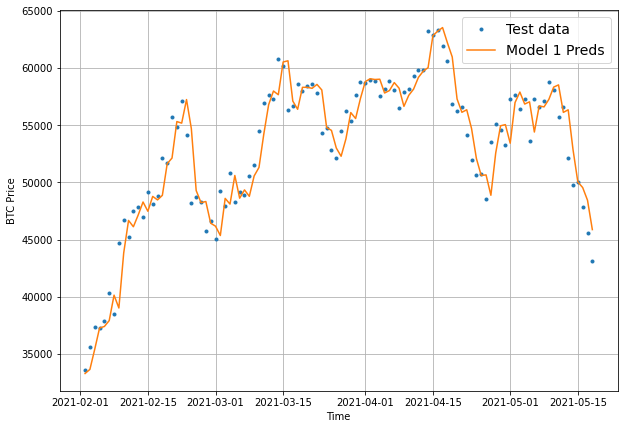

In [47]:
#plot the model
offset =450
plt.figure(figsize=(10,7))

#create for plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels,
                 start=offset,
                 label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="Model 1 Preds")



#Model 2 -Dense Model (window =30 horizon =1)

In [48]:
HORIZON=1
WINDOW_SIZE=30

In [49]:
#make window data
full_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [50]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes :
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))
[[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.10158771 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2757, 2757)

In [51]:
#make train and test windows
train_windows,test_windows,train_labels,test_labels =make_train_test_splits(windows=full_windows,
                                                                            labels=full_labels,
                                                                            test_split=0.2)

In [52]:
train_windows[:3]


array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [53]:
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2205, 2205, 552, 552)

In [54]:
tf.random.set_seed(42)

#craete model
model_2 =tf.keras.Sequential([
                              layers.Dense(128,activation="relu"),
                              layers.Dense(HORIZON)
],name="model_2_dense")


#compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])


#fit the model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [55]:
#evaluate the model
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [56]:
#load the best parameters
model_2=tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [57]:
#get the predictions
model_2_preds =make_preds(model_2,
                          input_data=test_windows)

In [58]:
#evaluate results
model_2_results=evaluate_preds(y_true=test_labels,
                               y_pred=model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693386,
 'mase': 1.0644706,
 'mse': 1281438.8,
 'rmse': 1132.0065}

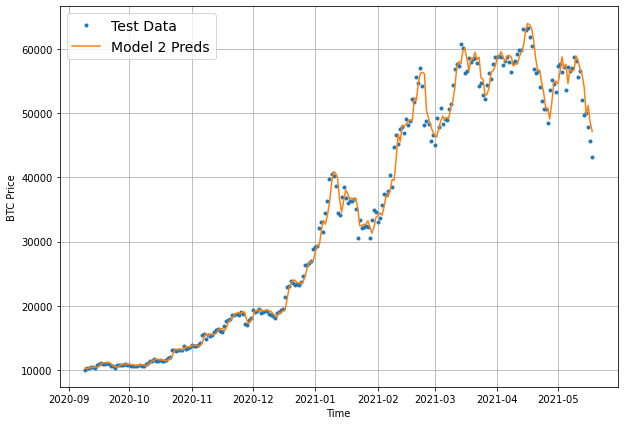

In [59]:
offset=300
plt.figure(figsize=(10,7))

#account the test windows size
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels,start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,start=offset,format="-",label="Model 2 Preds")

#Model 3 -Dense Model (window =30 horizon =7)

In [60]:
HORIZON=7
WINDOW_SIZE=30

In [61]:
#make window data
full_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [62]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes :
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))
[[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.19724227 63223.88439079 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2751, 2751)

In [63]:
#make train and test windows
train_windows,test_windows,train_labels,test_labels =make_train_test_splits(windows=full_windows,
                                                                            labels=full_labels,
                                                                            test_split=0.2)

In [64]:
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2200, 2200, 551, 551)

In [65]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [66]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 614.8192


614.8192138671875

In [67]:
#load the best parameters
model_3=tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 599.4505


599.4505004882812

In [68]:
#get the predictions
model_3_preds =make_preds(model_3,
                          input_data=test_windows)

In [69]:
model_3_preds[:5],model_3_preds.shape

(<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
 array([[9204.087, 9307.428, 9346.239, 9322.108, 9257.569, 9408.65 ,
         9321.06 ],
        [8878.963, 8993.068, 9073.988, 8917.815, 8803.415, 8948.541,
         8976.297],
        [8878.328, 8860.245, 8951.54 , 8820.758, 8678.005, 8791.144,
         8837.626],
        [9049.313, 8896.042, 8904.545, 8942.667, 8702.5  , 8909.269,
         8862.655],
        [8939.769, 8811.958, 8700.014, 8811.644, 8785.342, 8908.778,
         8771.228]], dtype=float32)>, TensorShape([551, 7]))

#Make Evaluation Function to larger horizons

In [70]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [71]:
model_3_preds

<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9204.087,  9307.428,  9346.239, ...,  9257.569,  9408.65 ,
         9321.06 ],
       [ 8878.963,  8993.068,  9073.988, ...,  8803.415,  8948.541,
         8976.297],
       [ 8878.328,  8860.245,  8951.54 , ...,  8678.005,  8791.144,
         8837.626],
       ...,
       [58022.695, 58599.32 , 58288.598, ..., 57827.69 , 58837.508,
        58451.793],
       [57997.766, 58582.61 , 58645.945, ..., 57853.39 , 58861.723,
        58168.816],
       [56972.453, 57467.188, 56865.645, ..., 56488.65 , 56211.066,
        57261.836]], dtype=float32)>

In [72]:
#evaluate results
model_3_results=evaluate_preds(y_true=test_labels,
                               y_pred=tf.reduce_mean(model_3_preds))
model_3_results

{'mae': 14180.907,
 'mape': 96.06718,
 'mase': 25.829008,
 'mse': 301476260.0,
 'rmse': 17363.072}

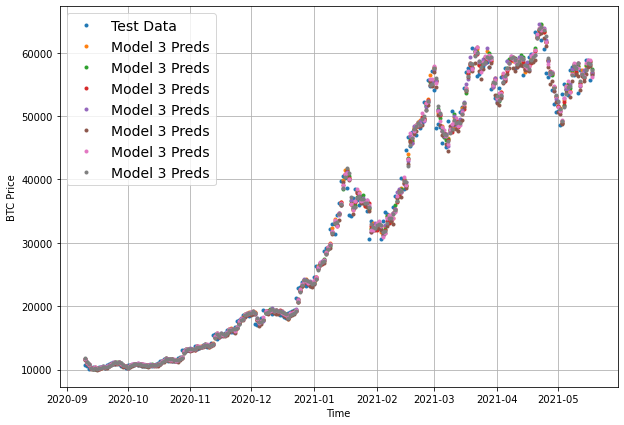

In [73]:
offset=300
plt.figure(figsize=(10,7))

#account the test windows size
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels,start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,label="Model 3 Preds")

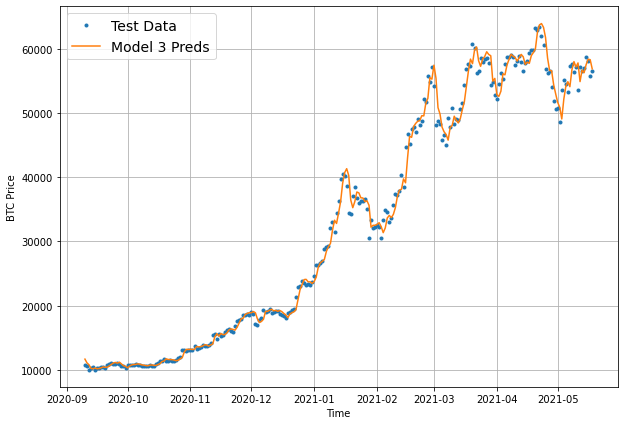

In [74]:
offset=300
plt.figure(figsize=(10,7))

#account the test windows size
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels,start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds,axis=1),
                 start=offset,
                 format="-",
                 label="Model 3 Preds")

#Check the model performance 

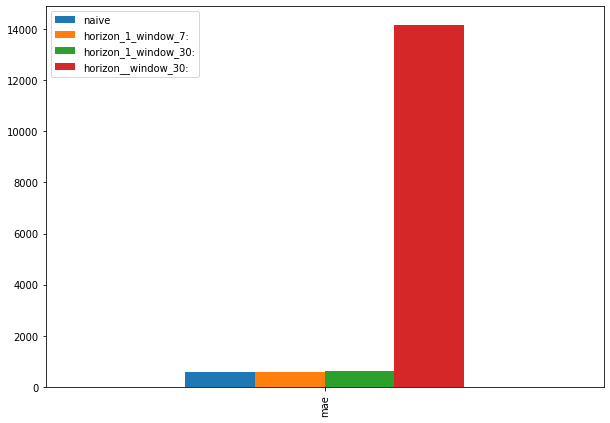

In [75]:
pd.DataFrame({"naive":naive_results["mae"],
              "horizon_1_window_7:":model_1_results["mae"],
              "horizon_1_window_30:":model_2_results["mae"],
              "horizon__window_30:":model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar")
            

#Model 4 -CONV1D model

In [76]:
HORIZON=1
WINDOW_SIZE=7

In [77]:
#create windowed data
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes :
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [78]:
#craete train/test data
train_windows,test_windows,train_labels,test_labels =make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_labels),len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [79]:
test_windows[0]

array([9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
       9335.75240233, 9226.48582088, 8794.35864452])

In [80]:
test_windows[0].shape

(7,)

#Reshape the data

In [81]:
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [82]:
expand_dims_layer =layers.Lambda(lambda x:tf.expand_dims(x,axis=1))

In [83]:
#test our out lambda layer
print(f"Original shape :{x.shape}")
print(f"Expand shape :{expand_dims_layer(x).shape}")
print(f"Original Value with expand shape :\n{expand_dims_layer(x)}")



Original shape :(7,)
Expand shape :(7, 1)
Original Value with expand shape :
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [84]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])



INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [85]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [86]:
#evaluate the model
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 610.1540


610.1539916992188

In [87]:
#load the best parameters
model_4=tf.keras.models.load_model("/content/model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 570.8284


570.8284301757812

In [88]:
#make predcitons
model_4_preds=make_preds(model_4,test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.465, 8754.47 , 8983.928, 8759.672, 8703.628, 8708.294,
       8661.668, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [89]:
#evaluate the predcitons
model_4_results =evaluate_preds(y_true=test_labels,
                                y_pred=model_4_preds)

model_4_results

{'mae': 570.8284,
 'mape': 2.5593357,
 'mase': 1.0027875,
 'mse': 1176671.2,
 'rmse': 1084.7448}

#Model 5 :RNN-LSTM Layer Model


In [90]:
HORIZON=1
WINDOW_SIZE=7

In [91]:
#create windowed data
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes :
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [92]:
#craete train/test data
train_windows,test_windows,train_labels,test_labels =make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_labels),len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [93]:
test_windows[0].shape

(7,)

In [94]:
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [95]:
expand_dims_layer =layers.Lambda(lambda x:tf.expand_dims(x,axis=1))

In [96]:
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.LSTM(units=128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_5_LSTM")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_5.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 2s 27ms/step - loss: 2323.6082 - val_loss: 9222.6523
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 695.4739 - val_loss: 1486.0555
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 237.3967 - val_loss: 1298.9084
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 181.9180 - val_loss: 966.6430
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 173.5414 - val_loss: 941.4746
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 7/10

In [97]:
model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               69632     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [98]:
#evaluate the model
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 599.3067


599.3067016601562

In [99]:
#load the best parameters
model_5=tf.keras.models.load_model("/content/model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 598.6749


598.6749267578125

In [100]:
#make predcitons
model_5_preds=make_preds(model_5,test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8983.033, 8811.561, 8991.205, 8832.373, 8724.737, 8774.172,
       8732.739, 8537.5  , 8501.837, 8527.82 ], dtype=float32)>

In [101]:
#evaluate the predcitons
model_5_results =evaluate_preds(y_true=test_labels,
                                y_pred=model_5_preds)

model_5_results

{'mae': 598.67487,
 'mape': 2.6902084,
 'mase': 1.051706,
 'mse': 1279866.4,
 'rmse': 1131.3118}

In [102]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

#Built multivariate dataset



In [103]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [104]:
#add halving events
block_reward_1 =50
block_reward_2 =25
block_reward_3 =12.5
block_reward_4 =6.25
block_reward_5 =3.125

#block reward date
block_reward_2_datetime =np.datetime64("2012-11-28")
block_reward_3_datetime =np.datetime64("2016-07-09")
block_reward_4_datetime =np.datetime64("2020-05-18")


In [105]:
#create data rangers for the values
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [106]:
#add block reward column
bitcoin_prices_block =bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None



In [107]:
#add block reawrd values to the feature
bitcoin_prices_block.iloc[:block_reward_2_days,-1] =block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] =block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] =block_reward_4

In [108]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [109]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


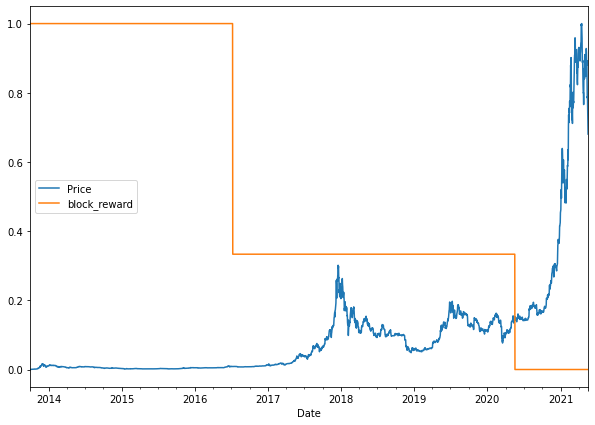

In [110]:
#plot the block reward with time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                                                     columns=bitcoin_prices_block.columns,
                                                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

#Make windowed dataset with pandas

In [111]:
#setup dataset parameters
HORIZON=1
WINDOW_SIZE=7

In [112]:
#make copy of the dataset
bitcoin_prices_windowed =bitcoin_prices_block.copy()
bitcoin_prices_windowed

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


In [113]:
#add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price {i+1}"] =bitcoin_prices_windowed["Price"].shift(periods =i+1)

bitcoin_prices_windowed.head()

,Price,block_reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [114]:
#create X windows and y horizon features
X =bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y =bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [115]:
y.head()


Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [116]:
#make train and test dataset
split_size=int(len(X)*0.8)
X_train,y_train =X[:split_size],y[:split_size]
X_test,y_test =X[split_size:],y[split_size:]
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

#Model 6 -Dense (Multivariate Time Series)

In [117]:
import tensorflow as tf
from tensorflow.keras import layers

#set a random seed for as reprodicibale results as possible
tf.random.set_seed(42)

#construct the model
model_6 =tf.keras.Sequential([
                              layers.Dense(128,activation="relu"),
                              layers.Dense(64,activation="relu"),
                              layers.Dense(HORIZON,activation="linear")
],name="model_6_dense")

#compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

#fit the model
model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 18ms/step - loss: 2079.9956 - mae: 2079.9956 - mse: 13861946.0000 - val_loss: 1938.4285 - val_mae: 1938.4285 - val_mse: 10203312.0000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 413.2998 - mae: 413.2998 - mse: 653961.3125 - val_loss: 1856.3627 - val_mae: 1856.3627 - val_mse: 8139813.0000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 222.7559 - mae: 222.7559 - mse: 237900.5938 - val_loss: 1327.1108 - val_mae: 1327.1108 - val_mse: 4725947.5000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 192.0770 - mae: 192.0770 - mse: 192315.0625 - val_loss: 1037.4915 - val_mae: 1037.4915 - val_mse: 3487516.5000
INFO:tensorflow:Assets written to: m

In [118]:
#evaluate model on test data
model_6_results=model_6.evaluate(X_test,y_test)
model_6_results

18/18 [==============================] - 0s 3ms/step - loss: 569.0422 - mae: 569.0422 - mse: 1161159.6250


[569.042236328125, 569.042236328125, 1161159.625]

In [119]:
#load the save best performing model and evaluate
model_6 =tf.keras.models.load_model("/content/model_experiments/model_6_dense")
model_6_results=model_6.evaluate(X_test,y_test)
model_6_results

18/18 [==============================] - 0s 3ms/step - loss: 564.5521 - mae: 564.5521 - mse: 1158976.5000


[564.5520629882812, 564.5520629882812, 1158976.5]

In [120]:
#make predictions
model_6_preds =make_preds(model_6,X_test)
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8843.243, 8775.287, 9034.422, 8755.49 , 8744.502, 8750.394,
       8671.321, 8520.411, 8459.68 , 8528.583], dtype=float32)>

In [121]:
model_6_preds[0]



<tf.Tensor: shape=(), dtype=float32, numpy=8843.243>

In [122]:
#evaluate the predcitons
model_6_results =evaluate_preds(y_true=y_test,
                                y_pred=model_6_preds)

model_6_results

{'mae': 564.5521,
 'mape': 2.538174,
 'mase': 0.99176174,
 'mse': 1158976.5,
 'rmse': 1076.5577}

In [123]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

#Model 7 -N-BEATS Algorithem

In [124]:
#create n-beats custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon =horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers

    #block contains stack of 4 fully connected layers
    self.hidden=[tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers) ]

    #output block
    self.theta_layer =tf.keras.layers.Dense(theta_size,activation="linear",name="theta")

  
  def call(self,inputs):
    x=inputs
    for layer in self.hidden:
      x=layer(x)

    theta=self.theta_layer(x)

    #output the backcast and forecast from theta
    backcast,forecast =theta[:self.input_size],theta[:,-self.horizon:]
    return backcast,forecast

     

In [132]:
#setup dummy NBeats layer to reperesent data
tf.random.set_seed(42)
dummy_nbbeats_block_layer=NBeatsBlock(input_size=WINDOW_SIZE,
                                      theta_size=WINDOW_SIZE+HORIZON,
                                      horizon=HORIZON,
                                      n_neurons=128,
                                      n_layers=4)

In [133]:
#caeate dummy inputs
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [134]:
#pass dummy inputs to dummy nebeats layer
backcast,forecast =dummy_nbbeats_block_layer(dummy_inputs)

#these are the activation outputs of theta layer
print(f"Backcast :{tf.squeeze(backcast.numpy())}")
print(f"Forecast :{tf.squeeze(forecast.numpy())}")

Backcast :[ 0.07960155  0.32512054 -0.84286827 -0.69389844 -0.31720546 -0.5698734
 -0.6396661   1.007165  ]
Forecast :1.0071649551391602


#Preparing data for NBeats algorithem using tf.data API

In [136]:
HORIZON=1
WINDOW_SIZE=7

In [137]:
#Create n-beats data inputs
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [138]:
#add windows columns
bitcoin_prices_nbeats=bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price +{i+1}"] =bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price +1,Price +2,Price +3,Price +4,Price +5,Price +6,Price +7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [139]:
#make features and laabels 
X=bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y=bitcoin_prices_nbeats.dropna()["Price"]

#make train and test data set
split_size=int(len(X) *0.8)
X_train,y_train =X[:split_size],y[:split_size]
X_test,y_test =X[split_size:],y[split_size:]
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

In [142]:
#make tenserflow datasets
train_features_dataset =tf.data.Dataset.from_tensor_slices(X_train)
train_labels_features=tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset =tf.data.Dataset.from_tensor_slices(X_test)
test_labels_features=tf.data.Dataset.from_tensor_slices(y_test)

#combine labels and features
train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_features))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_features))

#batch and prefetch 
BATCH_SIZE=1024
train_dataset =train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset =test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

#Setup hyper parameters to N-Beats Algorithem

In [143]:
#values from n-beats paper
N_EPOCHS=5000
N_NEURONS =512
N_LAYERS=4
N_STACKS=30

INPUT_SIZE=WINDOW_SIZE*HORIZON
THETA_SIZE=INPUT_SIZE+HORIZON

INPUT_SIZE,THETA_SIZE

(7, 8)